## Experiment

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [6]:
results_df=pd.read_csv('results.csv')

In [7]:
df_agg = results_df.groupby(["status", "step"]).agg(["mean", "std"]).reset_index()
df_agg

status step train_acc           train_cost           test_acc            \
                     mean       std       mean       std     mean       std   
0      amp    1  0.535937  0.216139   2.474949  1.515267  0.55375  0.202833   
1      amp    2  0.581250  0.184923   1.540978  1.000568  0.62500  0.237787   
2      amp    3  0.656250  0.213809   0.918787  0.682721  0.64750  0.238672   
3      amp    4  0.668750  0.249821   0.687011  0.523328  0.69750  0.221666   
4      amp    5  0.707813  0.215984   0.629712  0.489712  0.74125  0.204760   
..     ...  ...       ...       ...        ...       ...      ...       ...   
595    old   96  1.000000  0.000000   0.241996  0.007778  0.99750  0.004629   
596    old   97  1.000000  0.000000   0.240324  0.009705  0.99625  0.005175   
597    old   98  1.000000  0.000000   0.238632  0.008527  0.99750  0.004629   
598    old   99  0.998438  0.004419   0.236019  0.009366  0.99750  0.004629   
599    old  100  1.000000  0.000000   0.233350  0.007896  0.99750  0.007071   

    test_cost            
         mean       std  
0    1.611576  1.055461  
1    0.958840  0.692586  
2    0.709159  0.493265  
3    0.639231  0.460951  
4    0.514264  0.387261  
..        ...       ...  
595  0.244056  0.009997  
596  0.241696  0.009435  
597  0.240896  0.011368  
598  0.238433  0.009919  
599  0.236069  0.011100  

[600 rows x 10 columns]

['old', 'new', 'norm', 'norm+amp']
[-0.0005082748830318451, 0.0032894443720579425, 0.0017267587390960874, 0.0013804310874547753]


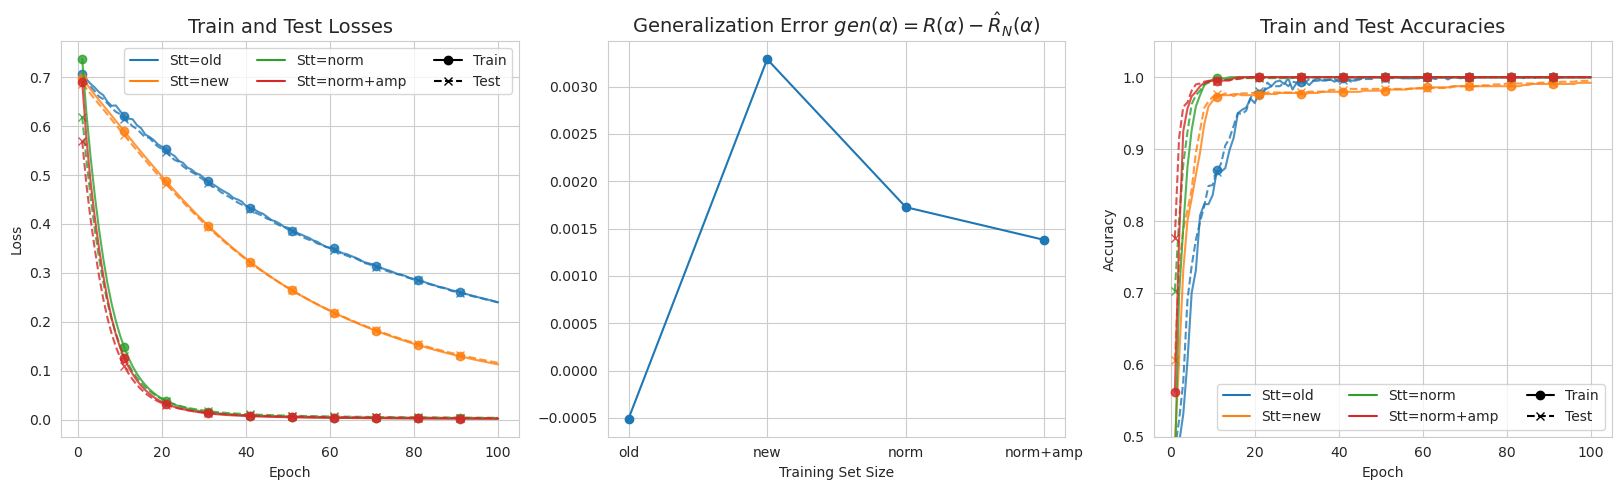

In [31]:
# Plotting
status=['old','new','norm','norm+amp']
sns.set_style('whitegrid')
colors = sns.color_palette()
fig, axes = plt.subplots(ncols=3, figsize=(16.5, 5))

generalization_errors = []

# Plot losses and accuracies
for i, stt in enumerate(status):
    df = df_agg[df_agg.status == stt]
    dfs = [df.train_cost["mean"], df.test_cost["mean"], df.train_acc["mean"], df.test_acc["mean"]]
    lines = ["o-", "x--", "o-", "x--"]
    labels = [fr"$N={stt}$", None, fr"$N={stt}$", None]
    axs = [0, 0, 2, 2]

    for k in range(4):
        ax = axes[axs[k]]
        ax.plot(df.step, dfs[k], lines[k], label=labels[k], markevery=10, color=colors[i], alpha=0.8)

    # Compute generalization error
    dif = df[df.step == 100].test_cost["mean"].values[0] - df[df.step == 100].train_cost["mean"].values[0]
    generalization_errors.append(dif)
print(status)
print(generalization_errors)
# Format plots
axes[0].set_title('Train and Test Losses', fontsize=14)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')

axes[1].plot(status, generalization_errors, "o-", label=r"$gen(\alpha)$")
# axes[1].set_xscale('log')
axes[1].set_xticks(status)
axes[1].set_xticklabels(status)
axes[1].set_title(r'Generalization Error $gen(\alpha) = R(\alpha) - \hat{R}_N(\alpha)$', fontsize=14)
axes[1].set_xlabel('Training Set Size')
# axes[1].set_yscale('log', base=2)

axes[2].set_title('Train and Test Accuracies', fontsize=14)
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Accuracy')
axes[2].set_ylim(0.5, 1.05)

legend_elements = (
    [mpl.lines.Line2D([0], [0], label=f'Stt={n}', color=colors[i]) for i, n in enumerate(status)] +
    [
        mpl.lines.Line2D([0], [0], marker='o', ls='-', label='Train', color='Black'),
        mpl.lines.Line2D([0], [0], marker='x', ls='--', label='Test', color='Black')
    ]
)

axes[0].legend(handles=legend_elements, ncol=3)
axes[2].legend(handles=legend_elements, ncol=3)

plt.tight_layout()
plt.show()

['amp', 'new', 'old', 'norm', 'learned_pe', 'fixed_pe']
[0.0019787399978668, 0.00732687022536993, 0.002718368545174654, 0.003611982581787737, 0.008330924203619364, 0.008603044552728513]


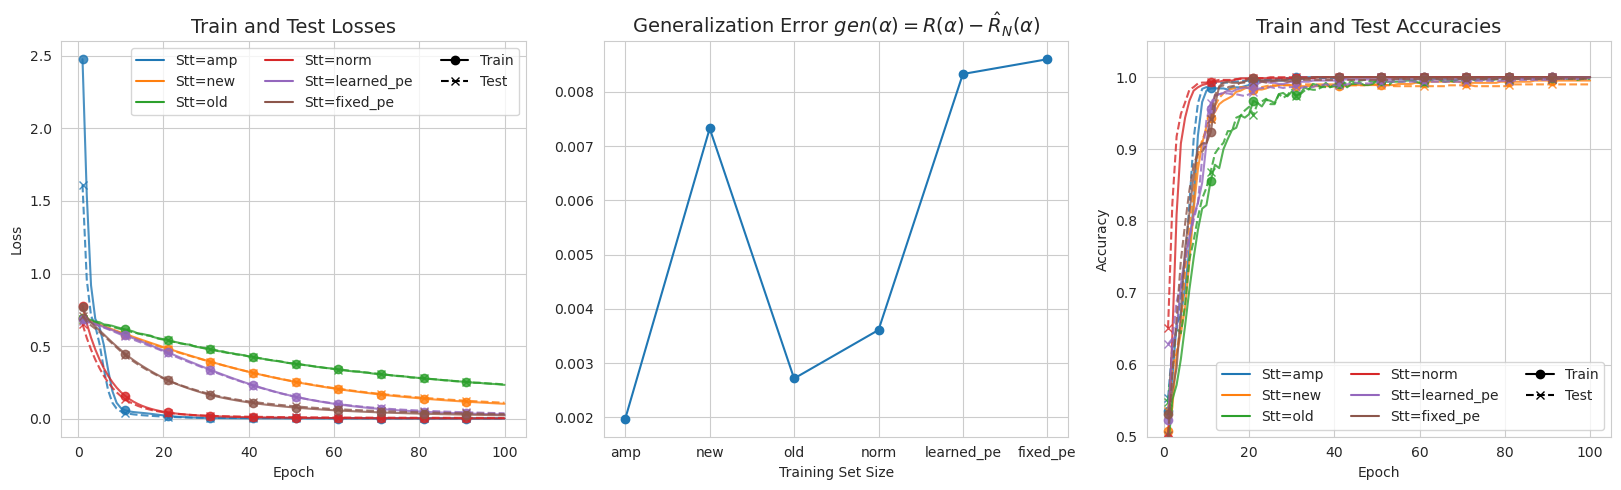

In [9]:
# Plotting
status=['amp','new','old','norm','learned_pe','fixed_pe']
sns.set_style('whitegrid')
colors = sns.color_palette()
fig, axes = plt.subplots(ncols=3, figsize=(16.5, 5))

generalization_errors = []

# Plot losses and accuracies
for i, stt in enumerate(status):
    df = df_agg[df_agg.status == stt]
    dfs = [df.train_cost["mean"], df.test_cost["mean"], df.train_acc["mean"], df.test_acc["mean"]]
    lines = ["o-", "x--", "o-", "x--"]
    labels = [fr"$N={stt}$", None, fr"$N={stt}$", None]
    axs = [0, 0, 2, 2]

    for k in range(4):
        ax = axes[axs[k]]
        ax.plot(df.step, dfs[k], lines[k], label=labels[k], markevery=10, color=colors[i], alpha=0.8)

    # Compute generalization error
    dif = df[df.step == 100].test_cost["mean"].values[0] - df[df.step == 100].train_cost["mean"].values[0]
    generalization_errors.append(dif)
print(status)
print(generalization_errors)
# Format plots
axes[0].set_title('Train and Test Losses', fontsize=14)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')

axes[1].plot(status, generalization_errors, "o-", label=r"$gen(\alpha)$")
# axes[1].set_xscale('log')
axes[1].set_xticks(status)
axes[1].set_xticklabels(status)
axes[1].set_title(r'Generalization Error $gen(\alpha) = R(\alpha) - \hat{R}_N(\alpha)$', fontsize=14)
axes[1].set_xlabel('Training Set Size')
# axes[1].set_yscale('log', base=2)

axes[2].set_title('Train and Test Accuracies', fontsize=14)
axes[2].set_xlabel('Epoch')
axes[2].set_ylabel('Accuracy')
axes[2].set_ylim(0.5, 1.05)

legend_elements = (
    [mpl.lines.Line2D([0], [0], label=f'Stt={n}', color=colors[i]) for i, n in enumerate(status)] +
    [
        mpl.lines.Line2D([0], [0], marker='o', ls='-', label='Train', color='Black'),
        mpl.lines.Line2D([0], [0], marker='x', ls='--', label='Test', color='Black')
    ]
)

axes[0].legend(handles=legend_elements, ncol=3)
axes[2].legend(handles=legend_elements, ncol=3)

plt.tight_layout()
plt.show()

In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import torch

In [46]:
rng=np.random.RandomState(42)
# Training and Evaluation Code
def load_digits_data(n_train, n_test):
    """
    Load and preprocess digits dataset for digits 0 and 1.
    """
    digits = load_digits()
    X, y = digits.data, digits.target
    mask = (y == 0) | (y == 1)  # Filter for digits 0 and 1
    X, y = X[mask], y[mask]
    X = X / 16.0
    X = X.reshape(-1,4,16)
    y = y.astype(np.float32)  # Labels are already 0 and 1
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=n_train, test_size=n_test,random_state=rng)
    print(y_train)
    # Convert to tensors and move to device
    return (
        torch.tensor(X_train, dtype=torch.float32),
        torch.tensor(y_train, dtype=torch.float32).view(-1, 1),
        torch.tensor(X_test, dtype=torch.float32),
        torch.tensor(y_test, dtype=torch.float32).view(-1, 1)
    )

In [47]:
xtrain,ytrain,xtest,ytest = load_digits_data(80, 100)

[0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 1. 0. 0. 1. 0. 0. 0. 1.]
